In [1]:
!pip install pyspark pandas matplotlib seaborn

In [6]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Создание SparkSession
spark = SparkSession.builder \
    .master("spark://spark-master:7077") \
    .appName("WordCount") \
    .getOrCreate()



In [45]:
# Чтение CSV файла
df = spark.read.csv("hdfs://namenode:8020/airports.dat", header=False, inferSchema=True)

In [19]:
# Присвоение имен колонкам
df = df.withColumnRenamed("_c0", "id") \
       .withColumnRenamed("_c1", "name") \
       .withColumnRenamed("_c2", "city") \
       .withColumnRenamed("_c3", "country") \
       .withColumnRenamed("_c4", "iata_code") \
       .withColumnRenamed("_c5", "icao_code") \
       .withColumnRenamed("_c6", "latitude") \
       .withColumnRenamed("_c7", "longitude") \
       .withColumnRenamed("_c8", "altitude") \
       .withColumnRenamed("_c9", "timezone") \
       .withColumnRenamed("_c10", "type") \
       .withColumnRenamed("_c11", "region") \
       .withColumnRenamed("_c12", "object_type") \
       .withColumnRenamed("_c13", "source")

In [35]:
# Подсчет количества аэропортов по странам
country_counts_spark = df.groupBy("country").count()

In [36]:
from pyspark.sql.functions import col

In [41]:
# Получение 5 стран с самым большим количеством аэропортов
top_countries = country_counts_spark.orderBy(col("count").desc()).limit(5)

# Вывод результата
top_countries.show()

+-------------+-----+
|      country|count|
+-------------+-----+
|United States| 1512|
|       Canada|  430|
|    Australia|  334|
|       Russia|  264|
|       Brazil|  264|
+-------------+-----+



In [43]:
# Преобразование в Pandas DataFrame
top_countries_pandas = top_countries_spark.toPandas()

# Вывод результата
print(top_countries_pandas)

         country  count
0  United States   1512
1         Canada    430
2      Australia    334
3         Brazil    264
4         Russia    264


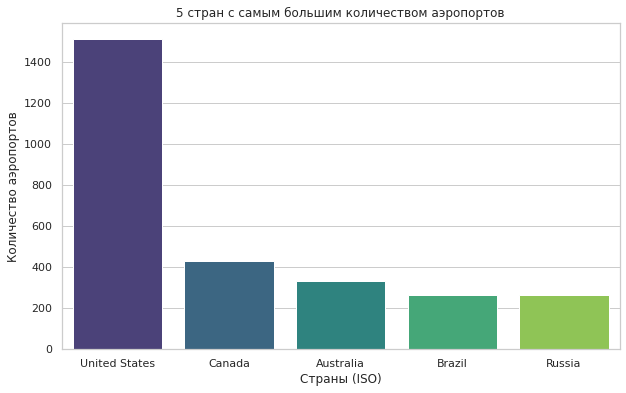

In [42]:
# Визуализация с помощью Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', data=top_countries_pandas, palette='viridis')
plt.title('5 стран с самым большим количеством аэропортов')
plt.xlabel('Страны (ISO)')
plt.ylabel('Количество аэропортов')
plt.show()

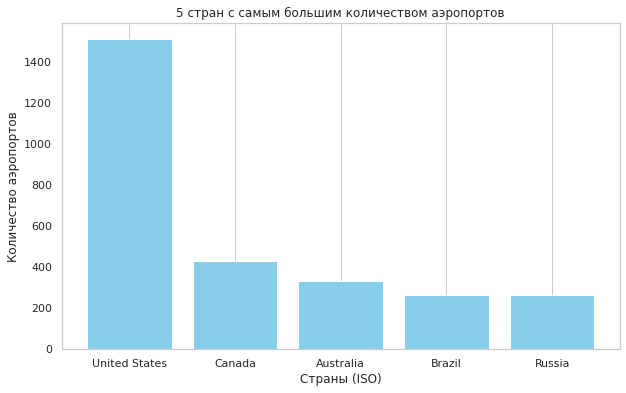

In [44]:
# Визуализация с помощью Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_countries_pandas['country'], top_countries_pandas['count'], color='skyblue')
plt.title('5 стран с самым большим количеством аэропортов')
plt.xlabel('Страны (ISO)')
plt.ylabel('Количество аэропортов')
plt.grid(axis='y')  # Добавление сетки по оси Y
plt.show()

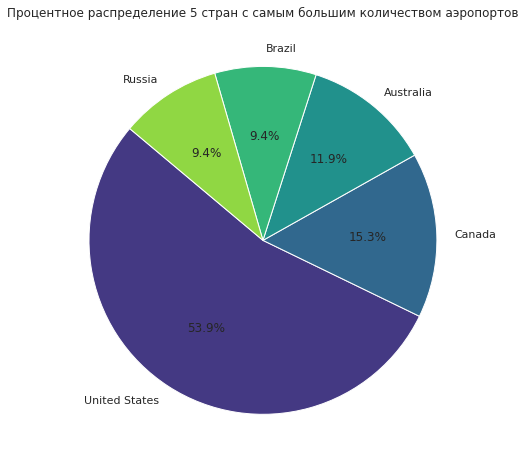

In [30]:
# Визуализация с помощью Matplotlib: круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries_pandas['count'], 
    labels=top_countries_pandas['country'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(top_countries_pandas))
)
plt.title('Процентное распределение 5 стран с самым большим количеством аэропортов')
plt.show()